In [1]:
import gensim
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
model = gensim.models.FastText.load("model.model")

In [3]:
most_similars_precalc = {word : model.wv.most_similar(word, topn = 3) for word in model.wv.index2word}

In [4]:
for i, (key, value) in enumerate(most_similars_precalc.items()):
    if i == 10:
        break
    print(key, value)

<UNK> [('marcus', 0.5368741154670715), ('lennon', 0.52900230884552), ('aristocrat', 0.5274332165718079)]
the [("'the", 0.5289022922515869), ('his', 0.5058464407920837), ("its'", 0.47931212186813354)]
and [('but', 0.43539369106292725), ('nor', 0.35933446884155273), ('including', 0.33515334129333496)]
a [("'a", 0.36023348569869995), ('another', 0.33916646242141724), ('semi', 0.3387641906738281)]
of [('amongst', 0.4476013481616974), ('among', 0.42068397998809814), ("'s", 0.4044751524925232)]
to [("he'll", 0.5251280069351196), ('auto', 0.5216183662414551), ("it'll", 0.5213943719863892)]
is [('was', 0.7726057171821594), ("isn't", 0.6551508903503418), ("wasn't", 0.5227319002151489)]
br [('anyway', 0.6250268816947937), ('anyways', 0.5249764919281006), ('overall', 0.4937621057033539)]
in [('within', 0.5050027370452881), ('during', 0.4966234266757965), ('onto', 0.4384421706199646)]
it [('he', 0.6408196091651917), ('she', 0.6280704736709595), ('item', 0.5524276494979858)]


In [5]:
# king - man = woman - result
result = model.wv.most_similar(positive=['woman', 'king'], negative = ['man'], topn = 5)
print(result)

[('lurking', 0.5726265907287598), ('kingsley', 0.5604714155197144), ('kings', 0.5336114764213562), ('joking', 0.5236150026321411), ('smoking', 0.5200926065444946)]


In [6]:
X = model.wv[model.wv.vocab]

In [7]:
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

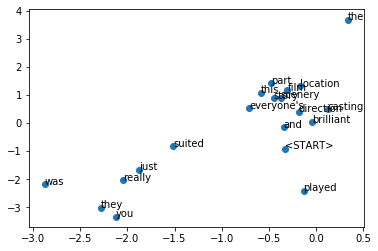

<Figure size 720000x720000 with 0 Axes>

In [8]:
plt.scatter(result[:20, 0], result[:20, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[:20]):
	plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.figure(figsize = (10000., 10000.))
plt.show()